<a href="https://colab.research.google.com/github/LAMECH9/LAMECH9/blob/main/PROJECT_2_Lamech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROBLEM**

In this section we try to  Predict future Bitcoin prices based on historical data. The project aims to predict Bitcoin prices using historical data (2014 - Jan 2022) and time series forecasting techniques such as ARIMA. It helps traders, investors, and researchers make data-driven decisions by analyzing past trends.

### **OBJECTIVE**

The objective of this project is to develop a predictive model for Bitcoin prices using historical data from 2014 to January 2022. By leveraging time series forecasting techniques such as ARIMA, the goal is to analyze past price trends, identify patterns, and generate accurate predictions for future Bitcoin prices. This will help traders, investors, and researchers make data-driven decisions by understanding potential price movements, volatility trends, and market behavior. The project aims to compare different forecasting models, evaluate their performance using metrics like RMSE and MAE, and provide insights into the most effective approach for Bitcoin price prediction.

### Step 1 | Setup and Initialization

# Step 1.1 | Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
from scipy import stats
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1.2 Loading dataset

Loads Bitcoin price data from a CSV file.

Displays the first few rows, data types, and summary statistics

In [ ]:
df = pd.read_csv('/content/Bitcoin.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2683 non-null   object 
 1   Open       2683 non-null   float64
 2   High       2683 non-null   float64
 3   Low        2683 non-null   float64
 4   Close      2683 non-null   float64
 5   Adj Close  2683 non-null   float64
 6   Volume     2683 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 146.9+ KB


,Open,High,Low,Close,Adj Close,Volume
count,2683.000000,2683.000000,2683.000000,2683.000000,2683.000000,2.683000e+03
mean,10989.900302,11286.625175,10662.957284,11003.581793,11003.581793,1.459304e+10
std,15902.616531,16331.949304,15408.069197,15908.160803,15908.160803,2.008458e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,601.778015,606.707001,596.048005,602.733490,602.733490,7.839140e+07
50%,6235.029785,6371.549805,6093.669922,6238.049805,6238.049805,4.999240e+09
75%,10316.638183,10495.605957,10067.539062,10317.936035,10317.936035,2.445092e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


# Step 1.3 Data Cleaning

Checks for missing values.

Detects and removes duplicate rows.

Converts the index into a datetime format for proper time-series analysis.

In [ ]:
# Handling Missing Data
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
# Handling Duplicates
print("\nChecking for duplicates:")
print(df.duplicated().sum()) #Count duplicate rows
df = df.drop_duplicates() # Remove duplicate rows


Checking for duplicates:
0


In [ ]:
# Ensure the index is a DatetimeIndex
df.index = pd.to_datetime(df.index)

# **Step 2 Exploring Data**

In this section we explore data using Time series forecasting

Reloads Bitcoin price data with Date as an index.

Selects Bitcoin data from November 9, 2021.

Computes statistical measures (mean, variance, correlation matrix).

In [ ]:
df1 = pd.read_csv('/content/Bitcoin.csv', parse_dates=True, index_col = ['Date'])
df1.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2022-01-11', '2022-01-12', '2022-01-13', '2022-01-14',
               '2022-01-15', '2022-01-16', '2022-01-17', '2022-01-18',
               '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', name='Date', length=2683, freq=None)

In [ ]:
# Select the Bitcoin Data for November 2021
df.loc['2021-11-09']

,2021-11-09
Open,6.754973e+04
High,6.853034e+04
Low,6.638206e+04
Close,6.697183e+04
Adj Close,6.697183e+04
Volume,4.235799e+10


In [ ]:
# Statistical Methods for EDA
# Key Statistics
print("Mean:", df['High'].mean())
print("Variance:", df['High'].var())
print("Correlation Matrix:\n", df.select_dtypes(include=[np.number]).corr())

Mean: 11286.625174832647
Variance: 266732568.06480837
Correlation Matrix:
                Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999535  0.999096  0.998846   0.998846  0.733541
High       0.999535  1.000000  0.999042  0.999496   0.999496  0.737056
Low        0.999096  0.999042  1.000000  0.999400   0.999400  0.726051
Close      0.998846  0.999496  0.999400  1.000000   1.000000  0.732466
Adj Close  0.998846  0.999496  0.999400  1.000000   1.000000  0.732466
Volume     0.733541  0.737056  0.726051  0.732466   0.732466  1.000000


# Step 3 Data Visualization

New Section
# Step 3.1 Advanced Data Visualization Creating Interactive charts with plotly using EDA

In [ ]:

fig = px.scatter(df, x='Low', y='High', color='Volume', title='Low vs High') # Creating an interactive scatter plot
fig.show() # Displaying the scatter plot

# Step 3.2 Feature Correlation Heatmap

Generating a heatmap to visualize the correlation between different features in the dataset.

This heatmap helps in identifying relationships between different features in the dataset.

It can reveal strong positive or negative correlations, which can be useful in feature selection and model improvement.

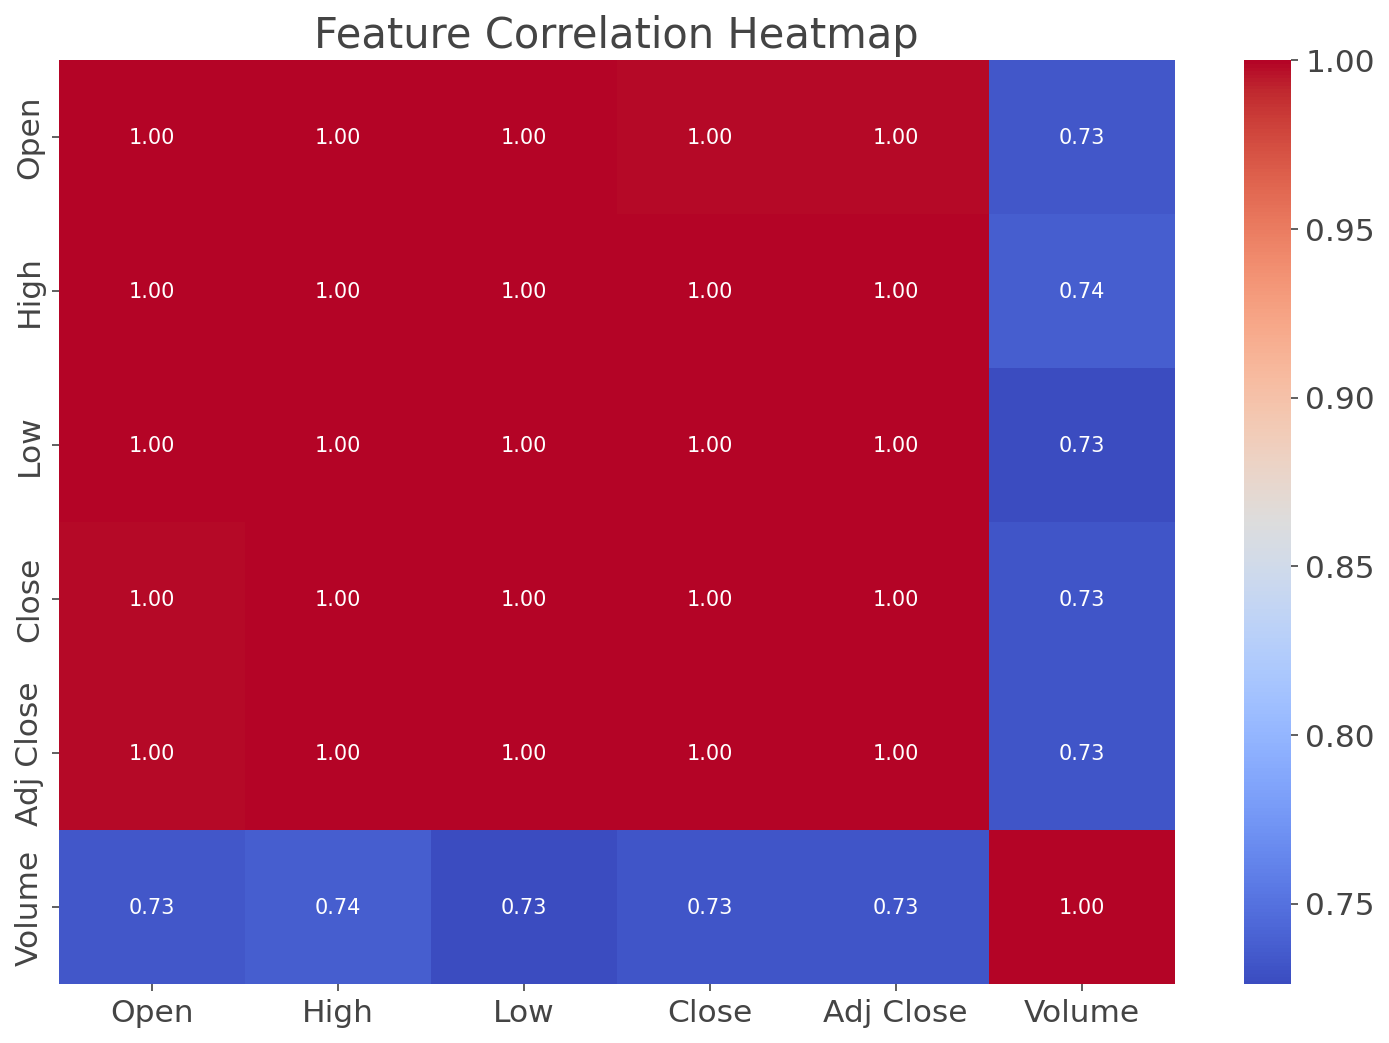

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 3.3 Box Plot

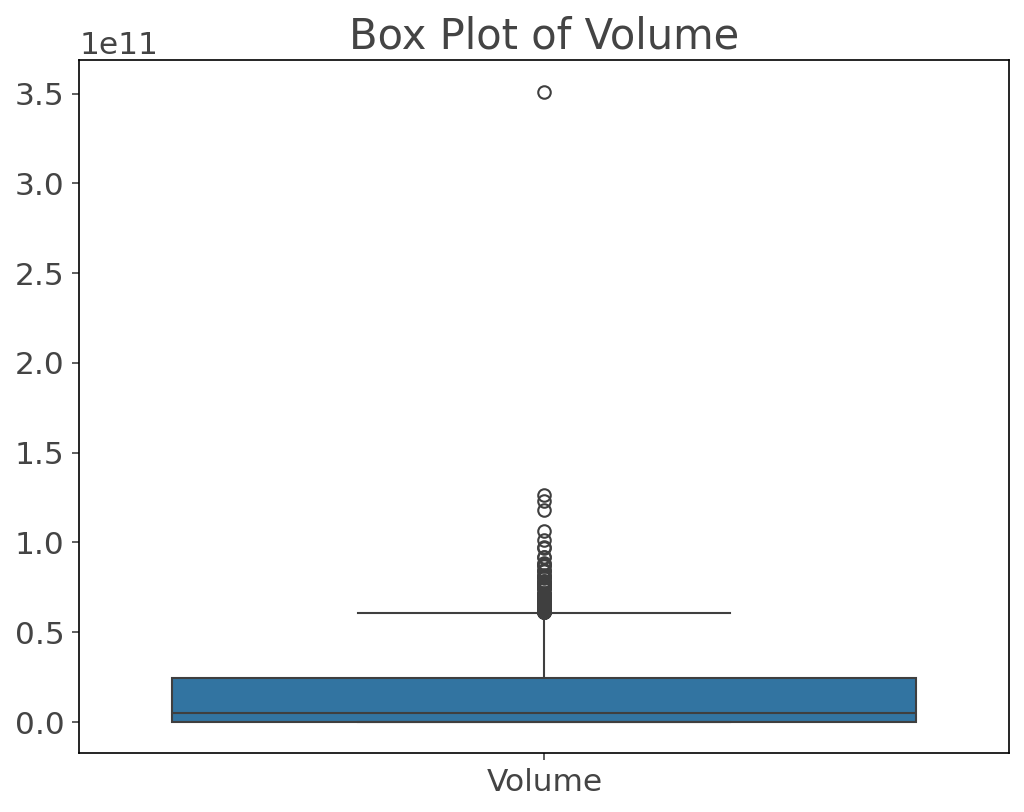

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['Volume']])
plt.title('Box Plot of Volume')
plt.show()

# Step 3.4 Pair Plot

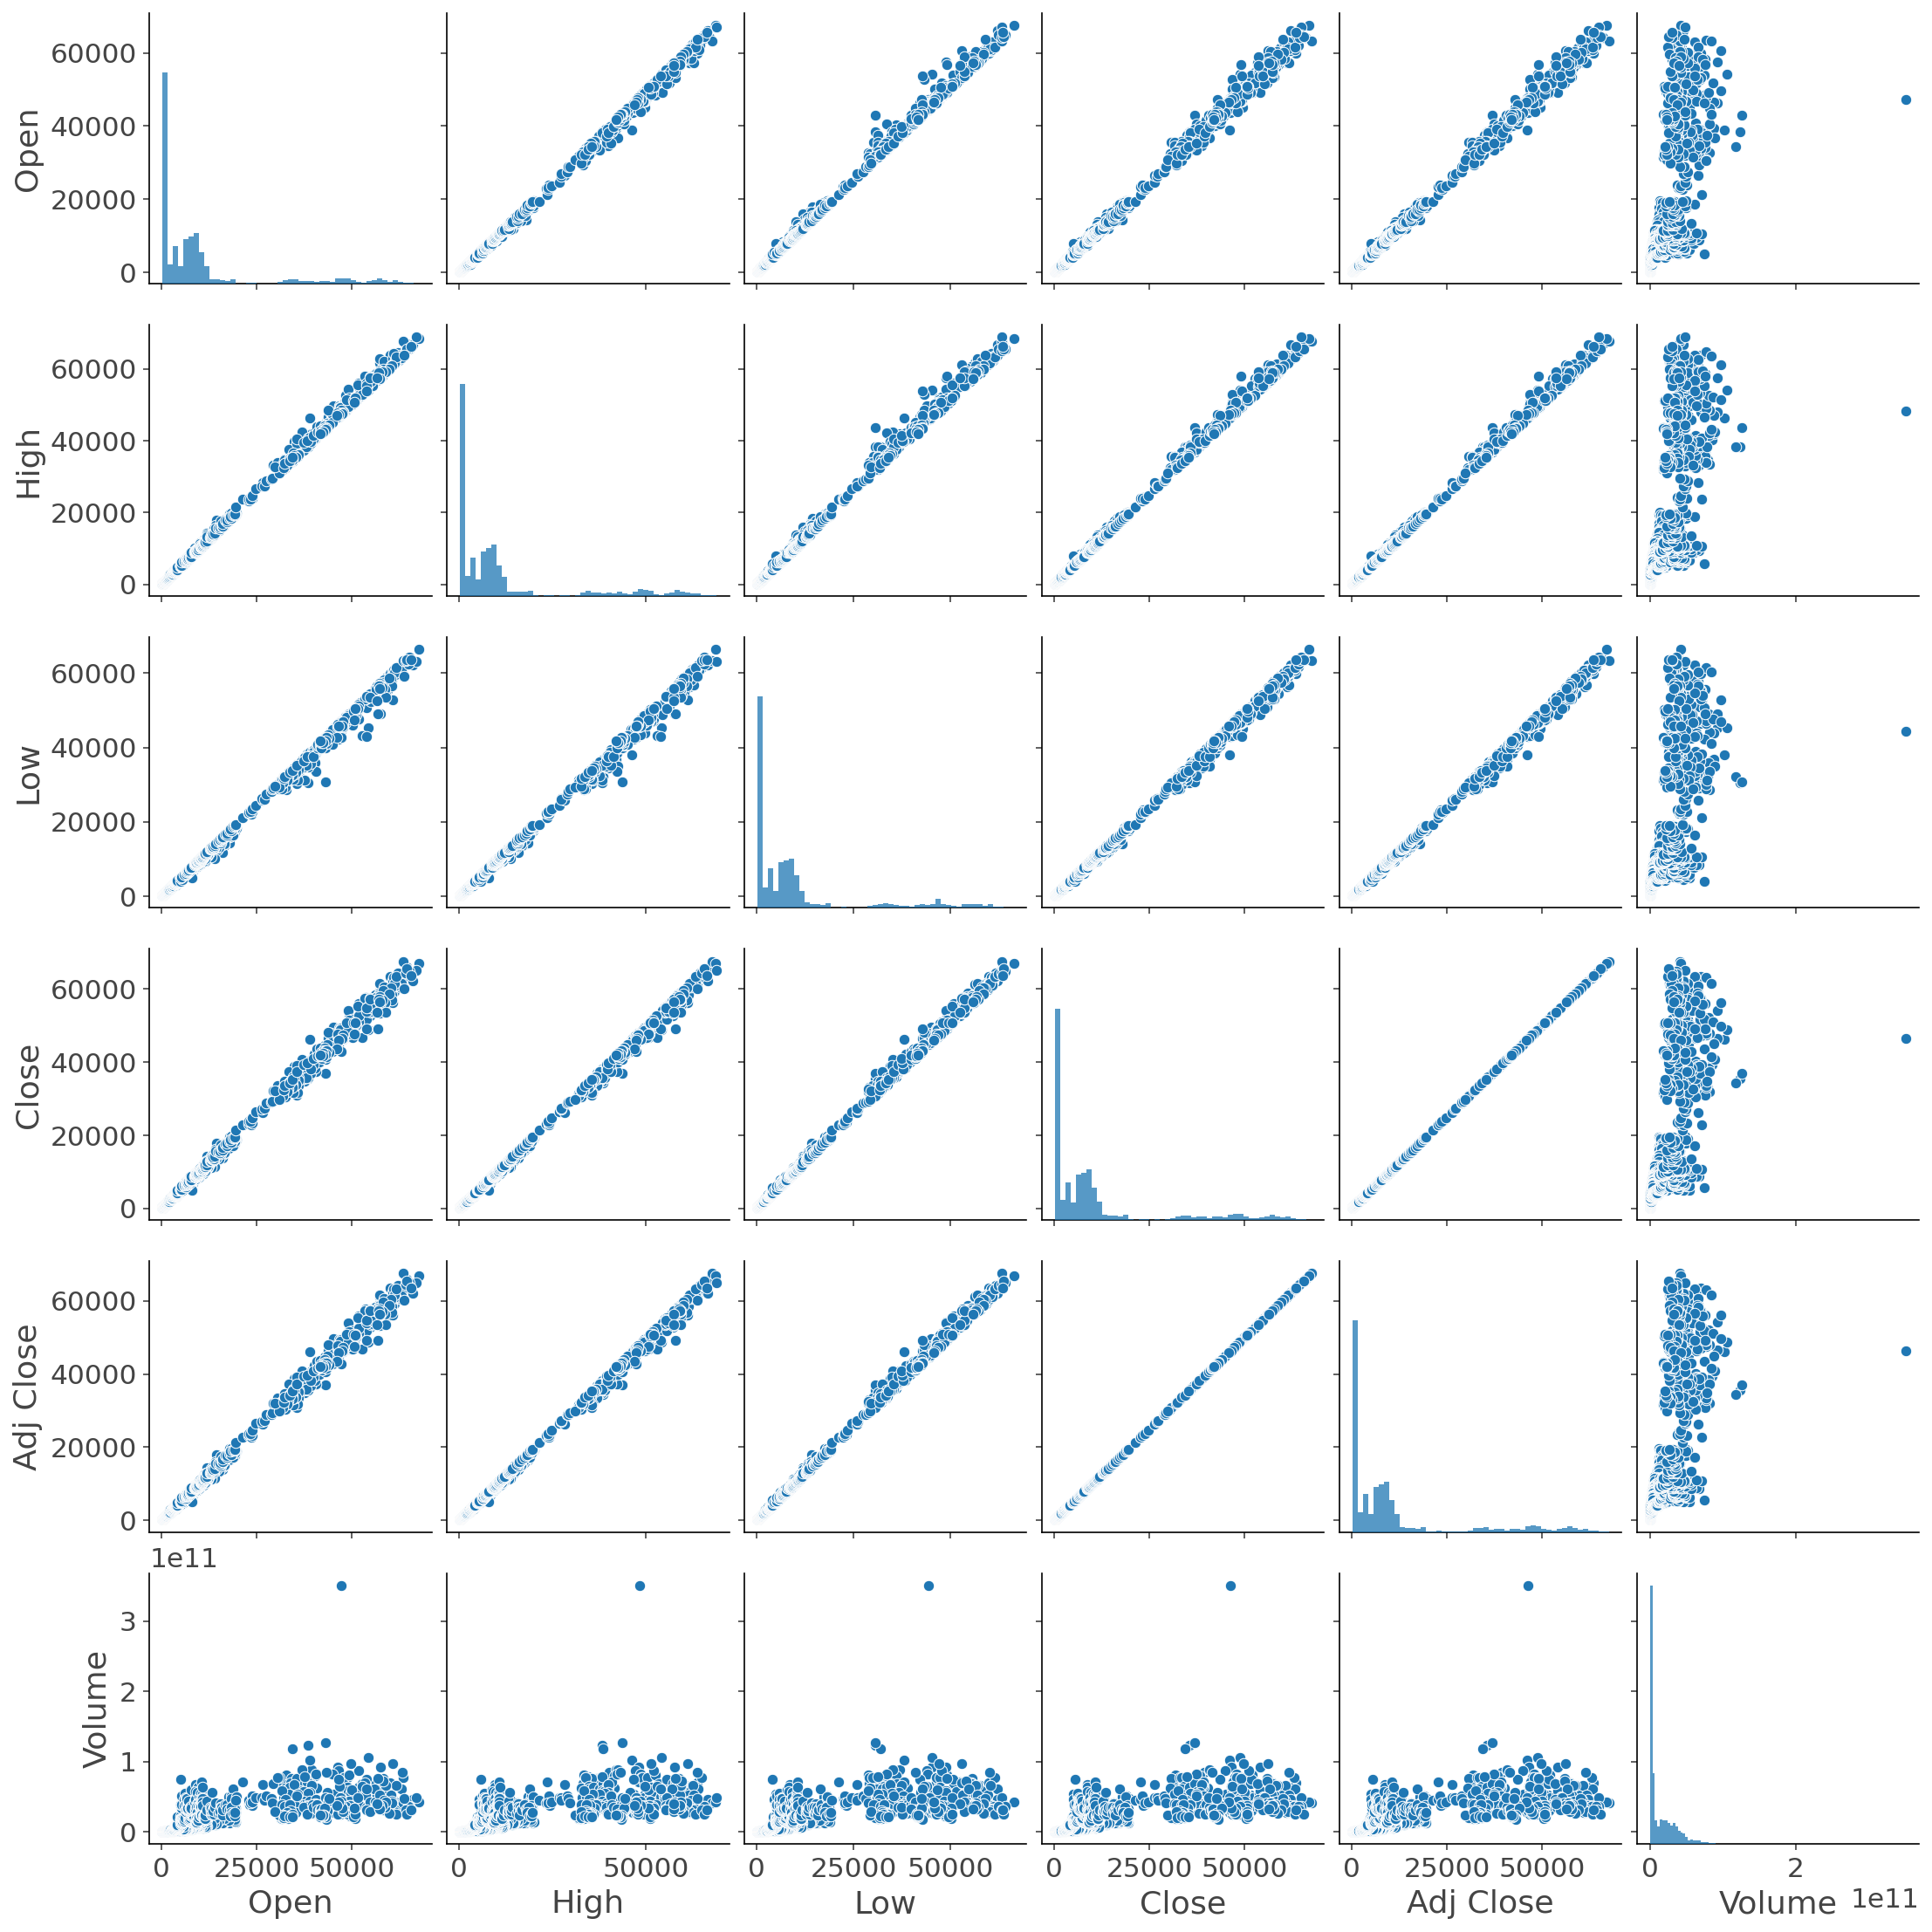

In [ ]:

sns.pairplot(df)
plt.show()

**Time Series Decomposition**

Decomposes Bitcoin's "High" price into:

Observed (original series)

Trend (long-term movements)

Seasonal (repeating patterns)

Residual (noise)

# **Step 4: Time Series Forecasting**

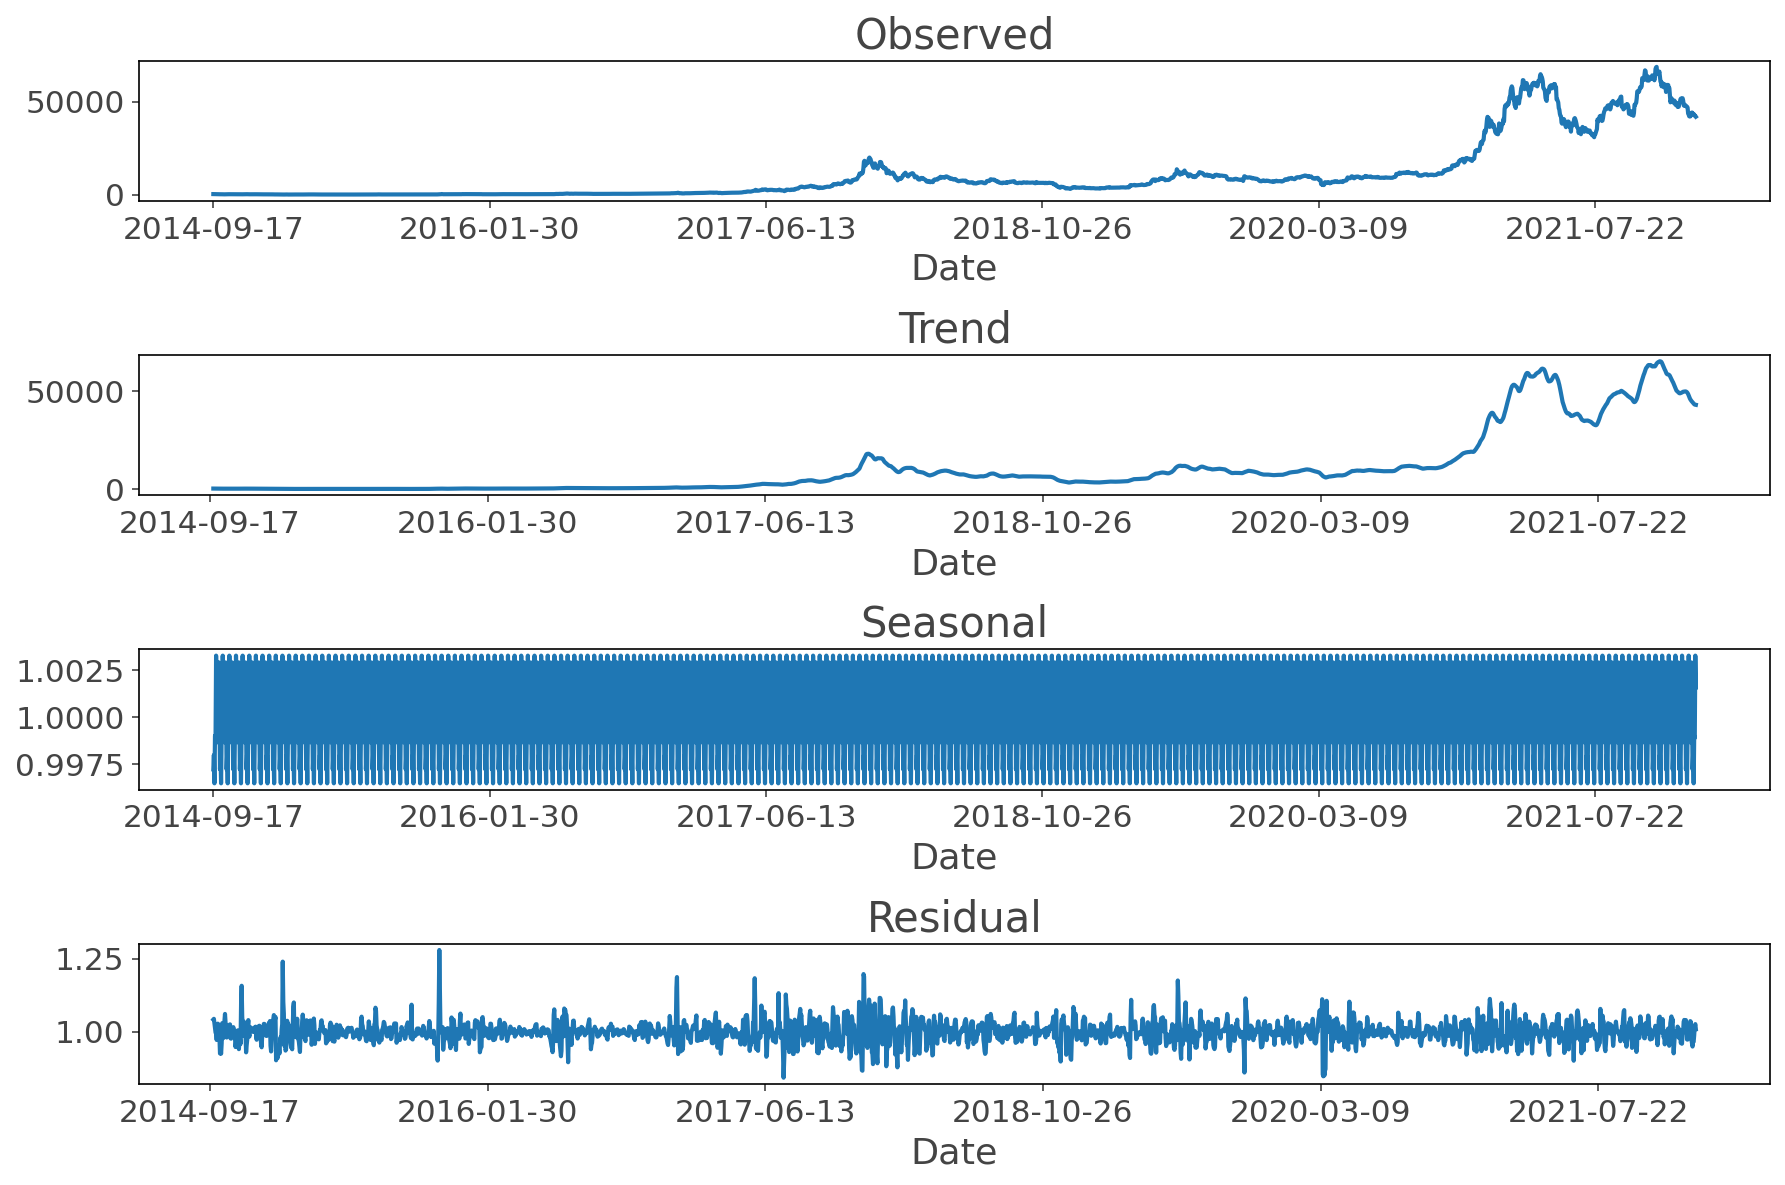

In [ ]:
# Time Series Decomposition
decomposition = seasonal_decompose(df['High'], model='multiplicative', period=12)
fig, axes = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=axes[0], title='Observed')
decomposition.trend.plot(ax=axes[1], title='Trend')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal')
decomposition.resid.plot(ax=axes[3], title='Residual')
plt.tight_layout()
plt.show()

#Step 5 Using SARIMA to predict Bitcoin Price

Splits the dataset into 80% training data and 20% test data.

In [ ]:
# Splitting Data
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [ ]:
# Model Evaluation
predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)
mae = mean_absolute_error(test['High'], predictions)
mse = mean_squared_error(test['High'], predictions)
rmse = np.sqrt(mse)
print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

MAE: 27299.44855373627, MSE: 1039089702.3785071, RMSE: 32234.914338004797


Text(0.5, 1.0, 'SARIMA Forecast vs Actual')

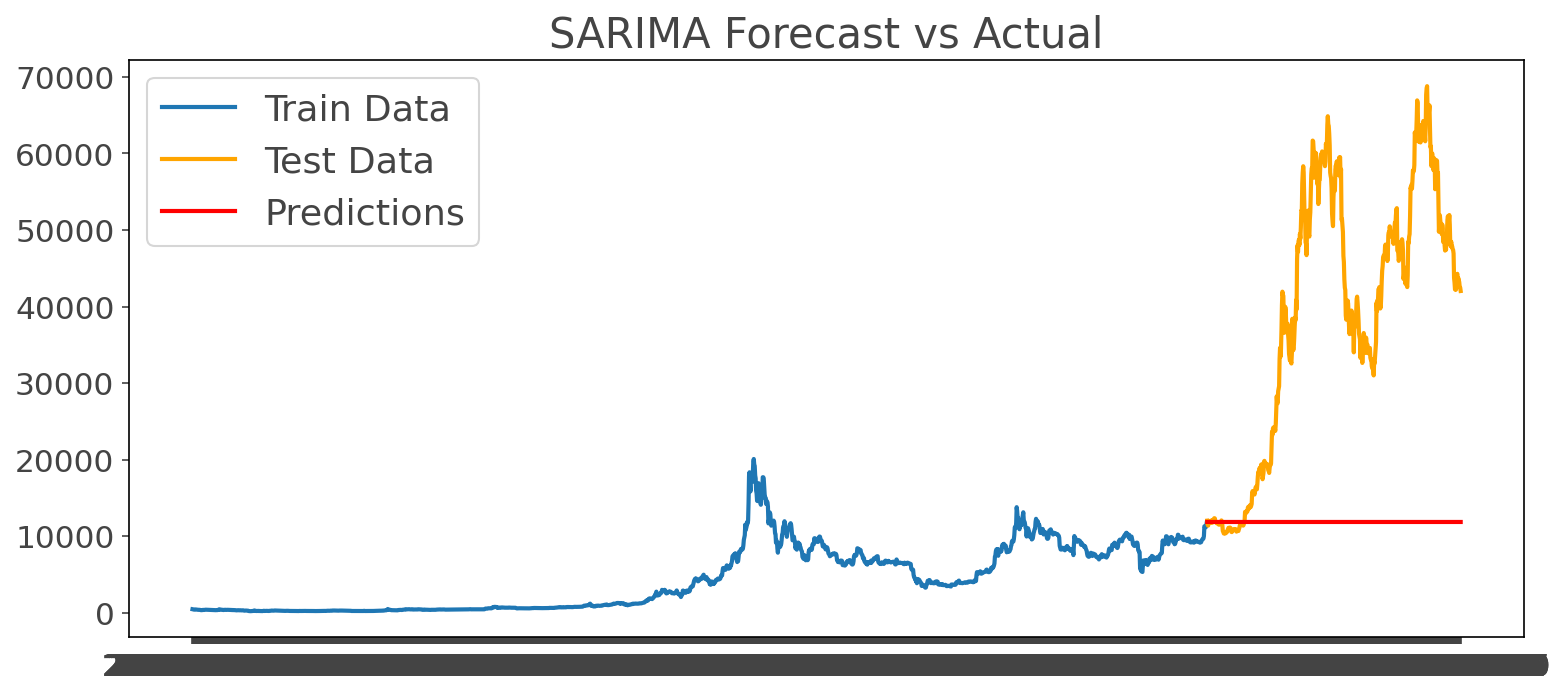

In [ ]:
# Plotting Predictions
plt.figure(figsize=(12, 5))
plt.plot(train.index,train['High'],label='Train Data')
plt.plot(test.index,test['High'], label='Test Data', color='orange')
plt.plot(test.index,predictions, label='Predictions', color='red')
plt.legend()
plt.title('SARIMA Forecast vs Actual')

In [ ]:
# Forecasting Future Values
future_steps = 1700
forecast = model_fit.forecast(steps=future_steps)
print(f'Forecasted Values:\n{forecast}')

Forecasted Values:
2020-08-02    11865.297674
2020-08-03    11862.216972
2020-08-04    11862.351550
2020-08-05    11862.345671
2020-08-06    11862.345928
                  ...     
2025-03-24    11862.345917
2025-03-25    11862.345917
2025-03-26    11862.345917
2025-03-27    11862.345917
2025-03-28    11862.345917
Freq: D, Name: predicted_mean, Length: 1700, dtype: float64


In [ ]:
# User Input & Prediction
steps = int(input("Enter the number of future steps to predict: "))
user_forecast = model_fit.forecast(steps=steps)
print(f'Predicted values for next {steps} steps:\n{user_forecast}')

Enter the number of future steps to predict: 5
Predicted values for next 5 steps:
2020-08-02    11865.297674
2020-08-03    11862.216972
2020-08-04    11862.351550
2020-08-05    11862.345671
2020-08-06    11862.345928
Freq: D, Name: predicted_mean, dtype: float64


# Step 6: Hypothesis Testing

In [ ]:
# 3.2 Hypothesis Testing
t_stat, p_value = stats.ttest_ind(df[df['Volume']=='Low']['Adj Close'], df[df['Volume']=='High']['Adj Close']) # Performing a t-test to compare means between male and female
print(f"t-test p-value: {p_value}") # Printing the p-value from the t-test

t-test p-value: nan


<ipython-input-122-034905d8decb>:2: SmallSampleWarning:

One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

